In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Credit Risk Problem

In [3]:
df = pd.read_excel('Company_Data2015.xlsx')

In [4]:
df.head()

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


In [5]:
df.shape

(3586, 67)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth Next Year                   3586 non-null   float64
 3   Equity Paid Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital Employed                     3586 non-null   float64
 6   Total Debt                           3586 non-null   float64
 7   Gross Block                          3586 non-null   float64
 8   Net Working Capital                  3586 non-null   float64
 9   Current Assets                       3586 non-null   float64
 10  Current Liabilities and Provisions   3586 non-null   float64
 11  Total Assets/Liabilities      

In [7]:
df.drop('Co_Code', axis = 1, inplace = True)

In [8]:
df.isnull().sum().sum()

118

In [9]:
# Missing Value Treated
for col in df.columns:
    val = df[col].isnull().sum()
    if val > 0:
        df[col].fillna(method ='ffill', inplace = True)

In [10]:
df.isnull().sum().sum()

0

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Networth Next Year,3586.0,725.045251,4769.681004,-8021.60,3.9850,19.015,123.8025,111729.10
Equity Paid Up,3586.0,62.966584,778.761744,0.00,3.7500,8.290,19.5175,42263.46
Networth,3586.0,649.746299,4091.988792,-7027.48,3.8925,18.580,117.2975,81657.35
Capital Employed,3586.0,2799.611054,26975.135385,-1824.75,7.6025,39.090,226.6050,714001.25
Total Debt,3586.0,1994.823779,23652.842746,-0.72,0.0300,7.490,72.3500,652823.81
...,...,...,...,...,...,...,...,...
Debtors Velocity (Days),3586.0,603.894032,10636.759580,0.00,8.0000,49.000,106.0000,514721.00
Creditors Velocity (Days),3586.0,2057.854992,54169.479197,0.00,8.0000,39.000,89.0000,2034145.00
Inventory Velocity (Days),3586.0,80.122421,139.349959,-199.00,0.0000,35.000,96.0000,996.00
Value of Output/Total Assets,3586.0,0.819757,1.201400,-0.33,0.0700,0.480,1.1600,17.63


In [12]:
df_int = df.select_dtypes(include='int64')
df_float = df.select_dtypes(include='float64')

In [13]:
df_numerical_colmns = df_int.columns.tolist() + df_float.columns.tolist()

<AxesSubplot:>

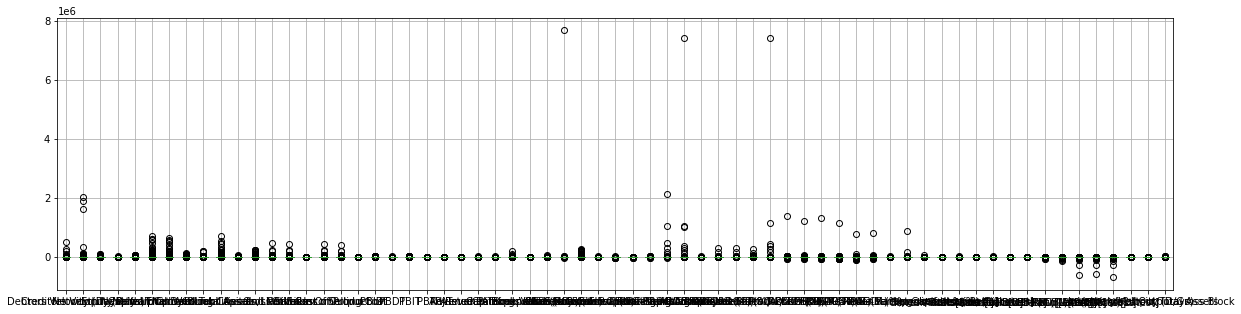

In [14]:
df.boxplot(column=df_numerical_colmns, figsize=(20, 5))

In [15]:
# From the above figure we observe presence of outliers. 
# We will treat the outliers before proceeding to model building.

def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [16]:
for column in df_numerical_colmns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

<AxesSubplot:>

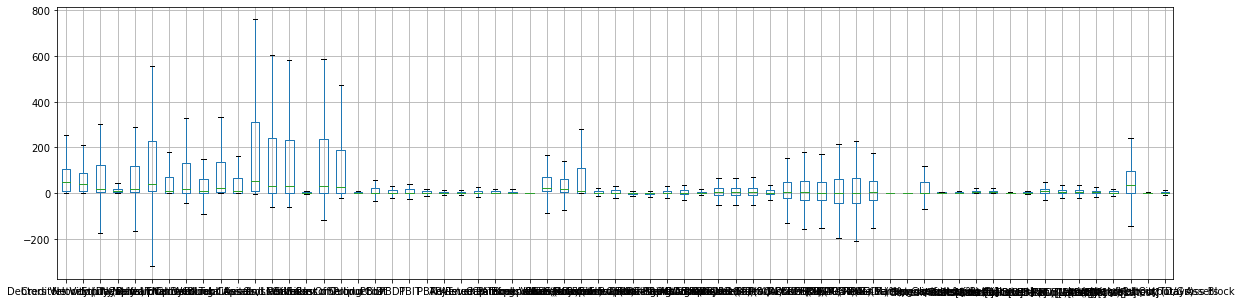

In [17]:
df.boxplot(column=df_numerical_colmns, figsize=(20, 5))

In [18]:
# Create a dependent variable based on the hint provided.
df['default'] = np.where(df['Networth Next Year'] < 0, 1, 0)
df.head()

,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,Current Liabilities and Provisions,...,PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block,default
0,Hind.Cables,-175.74125,43.16875,-166.215,-320.90125,180.83,328.8825,-89.40625,40.50000,163.02625,...,0.0000,0.00,0.00000,0.00000,0.0,0.0,45.0,0.00,0.00,1
1,Tata Tele. Mah.,-175.74125,43.16875,-166.215,555.10875,180.83,328.8825,-89.40625,332.19375,163.02625,...,-21.4275,-21.15,-17.08125,-11.11125,29.0,101.0,2.0,0.31,0.24,1
2,ABG Shipyard,-175.74125,43.16875,287.405,555.10875,180.83,328.8825,151.52375,332.19375,163.02625,...,-21.4275,-21.15,-17.08125,-11.11125,97.0,210.5,0.0,-0.03,-0.26,1
3,GTL,-175.74125,43.16875,-166.215,555.10875,180.83,328.8825,-89.40625,332.19375,163.02625,...,-7.2100,-21.15,-17.08125,-11.11125,93.0,63.0,2.0,0.24,1.90,1
4,Bharati Defence,-175.74125,43.16875,-166.215,555.10875,180.83,328.8825,151.52375,332.19375,163.02625,...,-21.4275,-21.15,28.46875,18.51875,253.0,210.5,0.0,0.01,0.05,1


In [19]:
# We will split the given data into train and test split in 67:33 ratio

from sklearn.model_selection import train_test_split

X = df.drop('default', axis = 1)
X = X.drop('Co_Name', axis = 1)
y = df['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [20]:
X_train.shape

(2402, 65)

In [21]:
X_test.shape

(1184, 65)

### 1.8 Build a Random Forest Model on Train Dataset. Also showcase your model building approach

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [23]:
param_grid = {
    'max_depth': [3, 5, 7],
    'max_features': [15, 25,35],
    'min_samples_leaf': [5, 10, 15],
    'min_samples_split': [15, 25, 30],
    'n_estimators': [5, 10, 15]
}
rfcl = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid)

In [24]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7], 'max_features': [15, 25, 35],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [15, 25, 30],
                         'n_estimators': [5, 10, 15]})

In [25]:
grid_search.best_params_

{'max_depth': 3,
 'max_features': 25,
 'min_samples_leaf': 5,
 'min_samples_split': 25,
 'n_estimators': 15}

In [26]:
best_grid = grid_search.best_estimator_

In [27]:
pred_train_rf = best_grid.predict(X_train)

In [28]:
print(metrics.classification_report(y_train, pred_train_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2157
           1       1.00      1.00      1.00       245

    accuracy                           1.00      2402
   macro avg       1.00      1.00      1.00      2402
weighted avg       1.00      1.00      1.00      2402



In [29]:
metrics.confusion_matrix(y_train, pred_train_rf)

array([[2157,    0],
       [   0,  245]], dtype=int64)

### Q 1.9 Validate the Random Forest Model on test Dataset and state the performance matrices. Also state interpretation from the model

In [30]:
pred_test_rf = best_grid.predict(X_test)

In [31]:
metrics.confusion_matrix(y_test, pred_test_rf)

array([[1042,    0],
       [   0,  142]], dtype=int64)

In [32]:
print(metrics.classification_report(y_test, pred_test_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1042
           1       1.00      1.00      1.00       142

    accuracy                           1.00      1184
   macro avg       1.00      1.00      1.00      1184
weighted avg       1.00      1.00      1.00      1184



### Q 1.10 Build a LDA Model on Train Dataset. Also showcase your model building approach

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_curve

In [34]:
LDA = LinearDiscriminantAnalysis()

In [35]:
lda_model = LDA.fit(X_train, y_train)

In [36]:
pred_train_lda = lda_model.predict(X_train)


In [37]:
print(metrics.classification_report(y_train, pred_train_lda))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2157
           1       0.84      0.55      0.66       245

    accuracy                           0.94      2402
   macro avg       0.90      0.77      0.82      2402
weighted avg       0.94      0.94      0.94      2402



In [38]:
pred_train_lda_prob = lda_model.predict_proba(X_train)[:,1]


In [39]:
fpr, tpr, thresholds = roc_curve(y_train,pred_train_lda_prob)

In [40]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.071556263941775

In [41]:
y_class_pred_train=[]
for i in range(0,len(pred_train_lda_prob)):
    if np.array(pred_train_lda_prob)[i]>0.071:
        a=1
    else:
        a=0
    y_class_pred_train.append(a)

In [42]:
metrics.confusion_matrix(y_train,y_class_pred_train)

array([[2003,  154],
       [  25,  220]], dtype=int64)

In [43]:
print(metrics.classification_report(y_train, y_class_pred_train,digits=3))

              precision    recall  f1-score   support

           0      0.988     0.929     0.957      2157
           1      0.588     0.898     0.711       245

    accuracy                          0.925      2402
   macro avg      0.788     0.913     0.834      2402
weighted avg      0.947     0.925     0.932      2402



### 1.11 Validate the LDA Model on test Dataset and state the performance matrices. Also state interpretation from the model

In [44]:
pred_test_lda = lda_model.predict(X_test)
pred_test_lda_prob = lda_model.predict_proba(X_test)[:,1]

In [45]:
print(metrics.classification_report(y_test, pred_test_lda))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1042
           1       0.87      0.56      0.68       142

    accuracy                           0.94      1184
   macro avg       0.91      0.77      0.82      1184
weighted avg       0.93      0.94      0.93      1184



In [46]:
y_class_pred_test=[]
for i in range(0,len(pred_test_lda_prob)):
    if np.array(pred_test_lda_prob)[i]>0.071:
        a=1
    else:
        a=0
    y_class_pred_test.append(a)

In [47]:
metrics.confusion_matrix(y_test, y_class_pred_test)

array([[944,  98],
       [ 20, 122]], dtype=int64)

In [48]:
print(metrics.classification_report(y_test, y_class_pred_test,digits=3))

              precision    recall  f1-score   support

           0      0.979     0.906     0.941      1042
           1      0.555     0.859     0.674       142

    accuracy                          0.900      1184
   macro avg      0.767     0.883     0.808      1184
weighted avg      0.928     0.900     0.909      1184



### 1.12 Compare the performances of Logistics, Radom Forest and LDA models (include ROC Curve)

AUC: 0.968


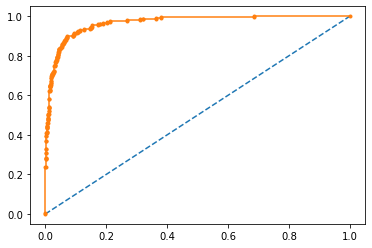

In [49]:
# LDA Train data - 0.5 Threshold

auc = roc_auc_score(y_train, pred_train_lda_prob)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_train, pred_train_lda_prob)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC: 0.913


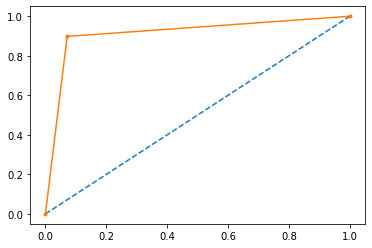

In [50]:
# LDA Train data - 0.071 Threshold

auc = roc_auc_score(y_train, y_class_pred_train)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_train, y_class_pred_train)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC: 0.955


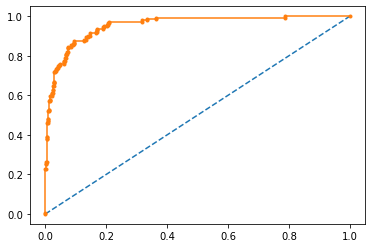

In [51]:
# LDA Test data - 0.5 Threshold

auc = roc_auc_score(y_test, pred_test_lda_prob)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, pred_test_lda_prob)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC: 0.883


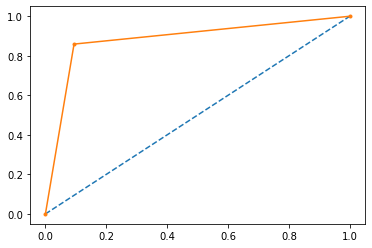

In [52]:
# LDA Test data - 0.071 Threshold

auc = roc_auc_score(y_test, y_class_pred_test)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, y_class_pred_test)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC: 1.000


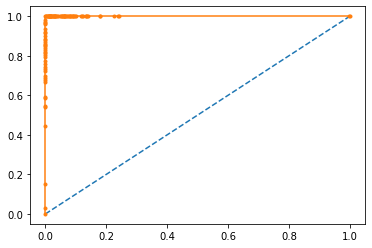

In [53]:
# RF - Train Data

probs = best_grid.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC: 1.000


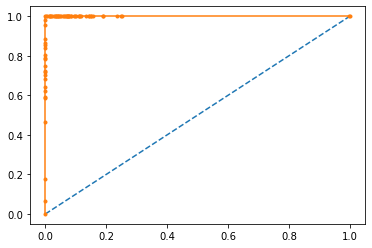

In [54]:
# RF - Test Data

probs = best_grid.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

# Market Risk Problem

In [55]:
stock_prices = pd.read_csv('Market+Risk+Dataset.csv')

In [56]:
stock_prices.head()

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [57]:
stock_prices.columns = stock_prices.columns.str.replace(' ', '_').str.replace('.', '')
stock_prices.head()

,Date,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [58]:
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 314 non-null    object
 1   Infosys              314 non-null    int64 
 2   Indian_Hotel         314 non-null    int64 
 3   Mahindra_&_Mahindra  314 non-null    int64 
 4   Axis_Bank            314 non-null    int64 
 5   SAIL                 314 non-null    int64 
 6   Shree_Cement         314 non-null    int64 
 7   Sun_Pharma           314 non-null    int64 
 8   Jindal_Steel         314 non-null    int64 
 9   Idea_Vodafone        314 non-null    int64 
 10  Jet_Airways          314 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 27.1+ KB


In [59]:
stock_prices.shape

(314, 11)

In [60]:
stock_prices.isnull().sum().sum()

0

### 2.1 Draw Stock Price Graph(Stock Price vs Time) for any 2 given stocks with inference

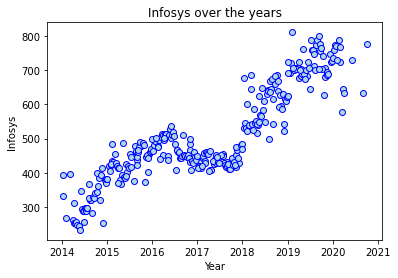

In [61]:
plt.figure(figsize = (6, 4))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Infosys'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('Infosys')
plt.title('Infosys over the years')
plt.show()

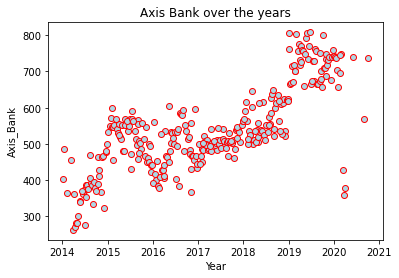

In [62]:
plt.figure(figsize = (6, 4))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Axis_Bank'], edgecolors='r', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('Axis_Bank')
plt.title('Axis Bank over the years')
plt.show()

### 2.2 Calculate Returns for all stocks with inference

In [63]:
stock_returns = np.log(stock_prices.drop(['Date','dates'],axis=1)).diff(axis = 0, periods = 1) 
stock_returns.head()

,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.026873,-0.014599,0.006572,0.048247,0.028988,0.032831,0.094491,-0.065882,0.011976,0.086112
2,-0.011742,0.000000,-0.008772,-0.021979,-0.028988,-0.013888,-0.004930,0.000000,-0.011976,-0.078943
3,-0.003945,0.000000,0.072218,0.047025,0.000000,0.007583,-0.004955,-0.018084,0.000000,0.007117
4,0.011788,-0.045120,-0.012371,-0.003540,-0.076373,-0.019515,0.011523,-0.140857,-0.049393,-0.148846


In [64]:
stock_returns.iloc[1:,:].sum()

Infosys                0.874521
Indian_Hotel           0.083382
Mahindra_&_Mahindra   -0.471323
Axis_Bank              0.365382
SAIL                  -1.084013
Shree_Cement           1.152290
Sun_Pharma            -0.455337
Jindal_Steel          -1.290374
Idea_Vodafone         -3.320228
Jet_Airways           -2.988564
dtype: float64

### 2.3 Calculate Stock Means and Standard Deviation for all stocks with inference

In [65]:
stock_means = stock_returns.mean(axis = 0)

In [66]:
stock_sd = stock_returns.std(axis = 0)

In [67]:
df = pd.DataFrame({'Average':stock_means, 'Volatility': stock_sd})

In [68]:
df

,Average,Volatility
Infosys,0.002794,0.035070
Indian_Hotel,0.000266,0.047131
Mahindra_&_Mahindra,-0.001506,0.040169
Axis_Bank,0.001167,0.045828
SAIL,-0.003463,0.062188
Shree_Cement,0.003681,0.039917
Sun_Pharma,-0.001455,0.045033
Jindal_Steel,-0.004123,0.075108
Idea_Vodafone,-0.010608,0.104315
Jet_Airways,-0.009548,0.097972


### Q 2.4 Draw a plot of Stock Means vs Standard Deviation and state your inference

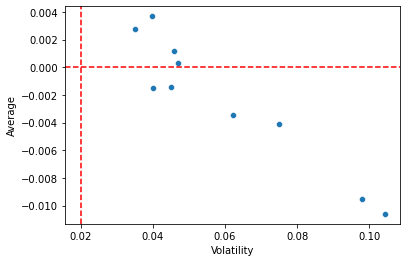

In [69]:
plot = sns.scatterplot(df['Volatility'], df['Average'])
plot.axvline(x=0.02,linestyle='--', color = "red")
plot.axhline(y=0.0,linestyle='--', color = "red")
plt.show()

### Q 2.5 Conclusion and Recommendations

In [70]:
df[df['Average'] > 0.0].sort_values(by = 'Volatility')

,Average,Volatility
Infosys,0.002794,0.035070
Shree_Cement,0.003681,0.039917
Axis_Bank,0.001167,0.045828
Indian_Hotel,0.000266,0.047131
